In [1]:
# ==============================
# Import required packages
# ==============================
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Add HarmoCycle module path
# ==============================
sys.path.append("./HarmoCycle/")

# Import custom functions
from HarmoCycle import *
from Utils import run_comprehensive_enrichment, display_enrichment_results, plot_go_bp_enrichment


Current working directory: /root/Cycle/Github


# mESC-Oscope

Starting enrichment analysis for 99 genes, organism: Mouse

Querying the following databases:
['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2019_Mouse']

Enrichment analysis completed.


                Enrichment Analysis Results

--- GO Biological Process (Top 10) ---
                                                                               Term  Adjusted P-value  Odds Ratio                                                                                                                                                                                                           Genes
0          SRP-dependent cotranslational protein targeting to membrane (GO:0006614)      2.755642e-54  185.365385         RPL4;RPL32;RPL34;RPLP1;RPL8;RPL9;RPL6;RPL7;RPS15;RPS4X;RPS14;RPS16;RPL18A;RPS19;RPS18;RPLP2;RPL38;RPS11;RPL39;RPS9;RPL41;RPL23;RPS5;RPL22;RPL35A;RPS26;RPS25;RPS28;RPL37A;RPL24;RPL26;RPS21;RPS24;RPS23
1                        cotransla

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/mESC_Oscope_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

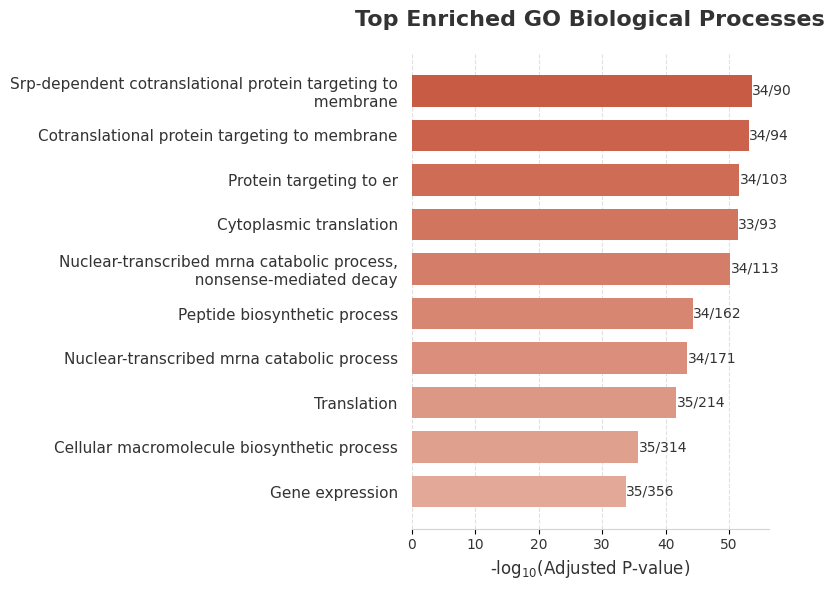

In [2]:
import pandas as pd
import scanpy as sc

# 1. Read the union gene list (uppercase gene names) from Oscope output
genes_upper = pd.read_table('./Dataset/Oscope_output/mESC_union_genes.txt')['x'].values

# 2. Load the single-cell dataset (h5ad format) and the corresponding mouse gene list
adata = sc.read_h5ad('./Dataset/mESC.h5ad')
gene_df = pd.read_table('/root/Cycle/Github/Dataset/mESC_genes_mouse.txt', header=None)

# Add the mouse gene names to adata.var as a new column
adata.var['mouse_gene'] = gene_df[0].values

# 3. Build a mapping dictionary:
#    - Keys: adata.var_names converted to uppercase (to match genes_upper)
#    - Values: corresponding mouse gene names from adata.var['mouse_gene']
mapping = dict(zip(adata.var_names.str.upper(), adata.var['mouse_gene']))

# 4. Retrieve the corresponding mouse gene set by ignoring case differences
#    - For each gene in genes_upper, convert to uppercase
#    - If it exists in the mapping, collect the mapped mouse gene
mouse_genes = [mapping[g.upper()] for g in genes_upper if g.upper() in mapping]

# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=mouse_genes, organism='Mouse')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/mESC_Oscope_GO_BP_Enrichment.png')

# hESC-Oscope

Starting enrichment analysis for 145 genes, organism: Human

Querying the following databases:
['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']

Enrichment analysis completed.


                Enrichment Analysis Results

--- GO Biological Process (Top 10) ---
                                                                               Term  Adjusted P-value  Odds Ratio                                                                                        Genes
0                  negative regulation of execution phase of apoptosis (GO:1900118)          0.000001   77.870504                                       MTRNR2L10;MTRNR2L6;MTRNR2L8;MTRNR2L1;MTRNR2L2;MTRNR2L3
1                        cotranslational protein targeting to membrane (GO:0006613)          0.000001   17.434744                                     RPL3;ARL6IP1;RPL21;RPLP0;RPS6;RPS3A;RPSA;RPL15;RPS2;RPL7
2                           regulation of execution phas

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/hESC_Oscope_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

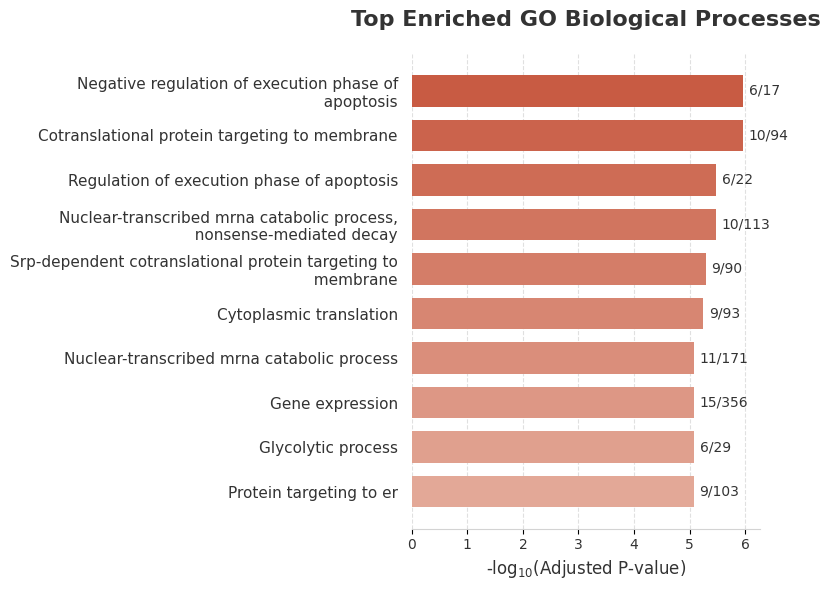

In [3]:
import pandas as pd
import scanpy as sc

# 1. Read the union gene list (uppercase gene names) from Oscope output
genes_upper = pd.read_table('./Dataset/Oscope_output/hESC_union_genes.txt')['x'].values

enrichment_result = run_comprehensive_enrichment(gene_list=list(genes_upper), organism='Human')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/hESC_Oscope_GO_BP_Enrichment.png')

# hU2OS-Oscope

Starting enrichment analysis for 15 genes, organism: Human

Querying the following databases:
['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']

Enrichment analysis completed.


                Enrichment Analysis Results

--- GO Biological Process (Top 10) ---
                                                                               Term  Adjusted P-value  Odds Ratio                                              Genes
0          SRP-dependent cotranslational protein targeting to membrane (GO:0006614)      8.958929e-14  277.393728  RPS27;RPS19;RPL31;RPLP1;RPL27A;RPL37A;RPLP2;RPL37
1                        cotranslational protein targeting to membrane (GO:0006613)      8.958929e-14  264.438538  RPS27;RPS19;RPL31;RPLP1;RPL27A;RPL37A;RPLP2;RPL37
2                                              protein targeting to ER (GO:0045047)      1.272163e-13  239.278195  RPS27;RPS19;RPL31;RPLP1;RPL27A;RPL37A;RPLP2;RPL37
3  nuclear-transcr

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/hU2OS_Oscope_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

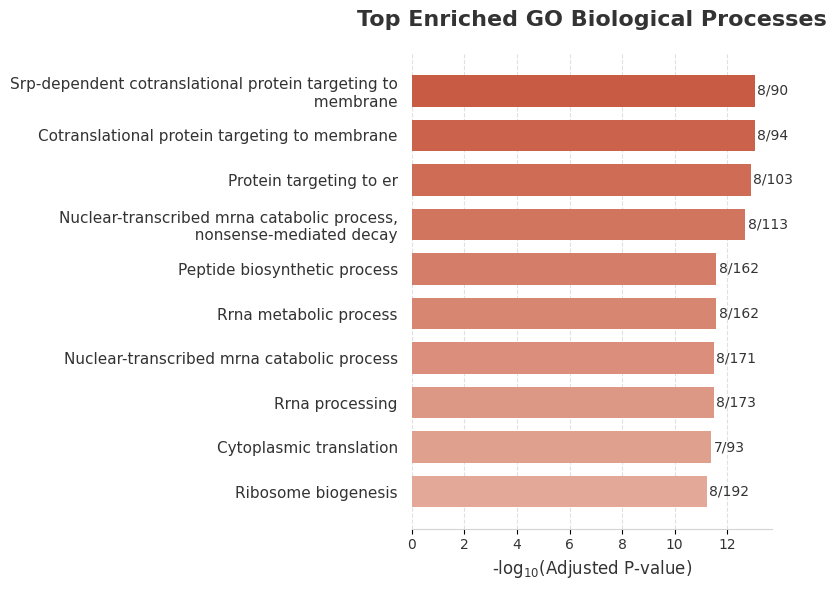

In [4]:
import pandas as pd
import scanpy as sc

# 1. Read the union gene list (uppercase gene names) from Oscope output
genes_upper = pd.read_table('./Dataset/Oscope_output/hU2OS_union_genes.txt')['x'].values

enrichment_result = run_comprehensive_enrichment(gene_list=list(genes_upper), organism='Human')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/hU2OS_Oscope_GO_BP_Enrichment.png')

# mESCQ-Oscope

In [5]:
import pandas as pd
import scanpy as sc

# 1. Read the union gene list (uppercase gene names) from Oscope output
genes_upper = pd.read_table('./Dataset/Oscope_output/mESCQ_union_genes.txt')['x'].values

# 2. Load the single-cell dataset (h5ad format) and the corresponding mouse gene list
adata = sc.read_h5ad('./Dataset/mESCQ.h5ad')
gene_df = pd.read_table('/root/Cycle/Github/Dataset/mESCQ_genes_mouse.txt', header=None)

# Add the mouse gene names to adata.var as a new column
adata.var['mouse_gene'] = gene_df[0].values

# 3. Build a mapping dictionary:
#    - Keys: adata.var_names converted to uppercase (to match genes_upper)
#    - Values: corresponding mouse gene names from adata.var['mouse_gene']
mapping = dict(zip(adata.var_names.str.upper(), adata.var['mouse_gene']))

# 4. Retrieve the corresponding mouse gene set by ignoring case differences
#    - For each gene in genes_upper, convert to uppercase
#    - If it exists in the mapping, collect the mapped mouse gene
mouse_genes = [mapping[g.upper()] for g in genes_upper if g.upper() in mapping]

# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=mouse_genes, organism='Mouse')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/mESCQ_Oscope_GO_BP_Enrichment.png')

Starting enrichment analysis for 27 genes, organism: Mouse

Querying the following databases:
['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2019_Mouse']

Enrichment analysis completed.


                Enrichment Analysis Results

--- GO Biological Process (Top 10) ---
                                                                                                 Term  Adjusted P-value  Odds Ratio           Genes
0                           negative regulation of intrinsic apoptotic signaling pathway (GO:2001243)          0.167974   25.691613      HSPB1;TPT1
29                                              negative regulation of apoptotic process (GO:0043066)          0.167974    5.054720  UBB;HSPB1;TPT1
31                                                      error-free translesion synthesis (GO:0070987)          0.167974   36.542125             UBB
32                      positive regulation of signal transduction by p53 class mediat

(None, None)

# mESC-HarmoCycle

  features  highly_variable     means  dispersions  dispersions_norm  \
0  POLDIP3             True  2.332406     2.476393          0.961741   
1    UBE2C             True  1.736467     2.337224          1.176769   
2     PRC1             True  1.731604     3.002395          1.764149   
3     LDHB             True  2.725338     2.331647          1.049307   
4  MT-CYTB             True  4.488899     3.631045          1.152702   

   dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
0                       1            0.549529           -0.132893   
1                       1            0.547454            1.122154   
2                       1            0.523320            1.042621   
3                       1            0.494638           -0.972679   
4                       1            0.463824           -2.152980   

   dominant_phase_deg  dominant_phase_norm  
0          352.385800             0.478849  
1           64.294710             0.678596  
2           59.73

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/mESC_HarmoCycle_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

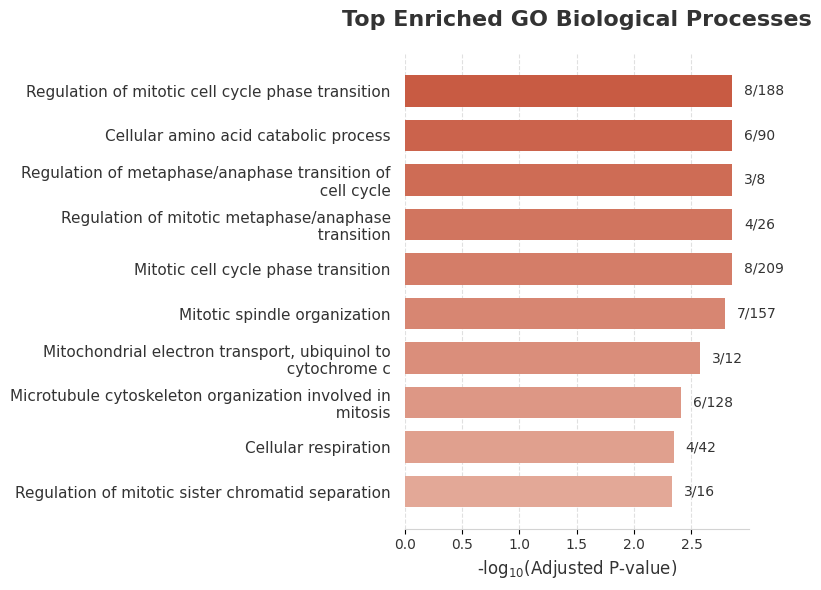

In [6]:
import pandas as pd
import scanpy as sc

file_path = "./Experiment/Temp_Result/mESC_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/mESC_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df['features'].head(n_genes).values
print("Number of selected features:", len(selected_features))
genes_upper = selected_features

# 2. Load the single-cell dataset (h5ad format) and the corresponding mouse gene list
adata = sc.read_h5ad('./Dataset/mESC.h5ad')
gene_df = pd.read_table('/root/Cycle/Github/Dataset/mESC_genes_mouse.txt', header=None)

# Add the mouse gene names to adata.var as a new column
adata.var['mouse_gene'] = gene_df[0].values

# 3. Build a mapping dictionary:
#    - Keys: adata.var_names converted to uppercase (to match genes_upper)
#    - Values: corresponding mouse gene names from adata.var['mouse_gene']
mapping = dict(zip(adata.var_names.str.upper(), adata.var['mouse_gene']))

# 4. Retrieve the corresponding mouse gene set by ignoring case differences
#    - For each gene in genes_upper, convert to uppercase
#    - If it exists in the mapping, collect the mapped mouse gene
mouse_genes = [mapping[g.upper()] for g in genes_upper if g.upper() in mapping]

# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=mouse_genes, organism='Mouse')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/mESC_HarmoCycle_GO_BP_Enrichment.png')

# hESC-HarmoCycle

          highly_variable     means  dispersions  dispersions_norm  \
HIST1H4C             True  2.080734     1.463660          3.386529   
CDK1                 True  1.257924     0.682214          2.213694   
TOP2A                True  1.705273     1.162954          2.790735   
AASS                 True  2.423916     1.661024          2.571950   
CCNB1                True  1.933370     0.583966          1.723482   

          dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
HIST1H4C                       1            0.825774            2.296184   
CDK1                           1            0.625172            1.863293   
TOP2A                          1            0.558951            1.343494   
AASS                           1            0.552118            2.784463   
CCNB1                          1            0.512446           -0.123412   

          dominant_phase_deg  dominant_phase_norm  
HIST1H4C           131.56168             0.865449  
CDK1              

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/hESC_HarmoCycle_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

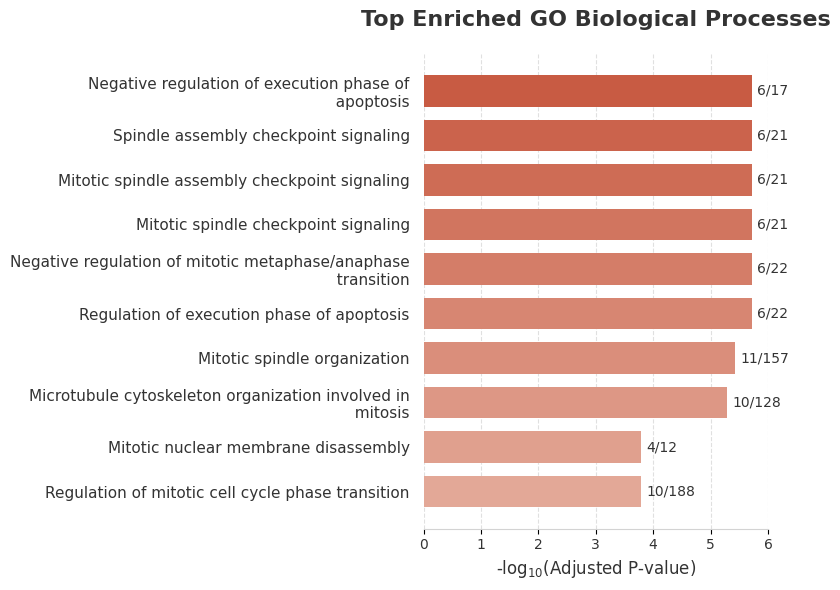

In [7]:
import pandas as pd
import scanpy as sc

file_path = "./Experiment/Temp_Result/hESC_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/hESC_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df.head(n_genes).index.tolist()
print("Number of selected features:", len(selected_features))
genes_upper = selected_features


# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=list(genes_upper), organism='Human')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/hESC_HarmoCycle_GO_BP_Enrichment.png')

# hU2OS-HarmoCycle

       highly_variable     means  dispersions  dispersions_norm  \
CCNB1             True  2.258128     1.664513          2.378023   
TOP2A             True  1.869244     1.173289          1.568885   
UBE2C             True  1.616754     1.276701          1.760679   
CDC20             True  2.023471     1.284540          1.705776   
CDK1              True  1.464084     1.187809          2.273354   

       dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
CCNB1                       1            0.895442            0.348597   
TOP2A                       1            0.876763           -0.602657   
UBE2C                       1            0.833371           -0.580721   
CDC20                       1            0.806269            0.288613   
CDK1                        1            0.792194           -0.948519   

       dominant_phase_deg  dominant_phase_norm  
CCNB1           19.973145             0.555481  
TOP2A          325.470300             0.404084  
UBE2C      

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/hU2OS_HarmoCycle_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

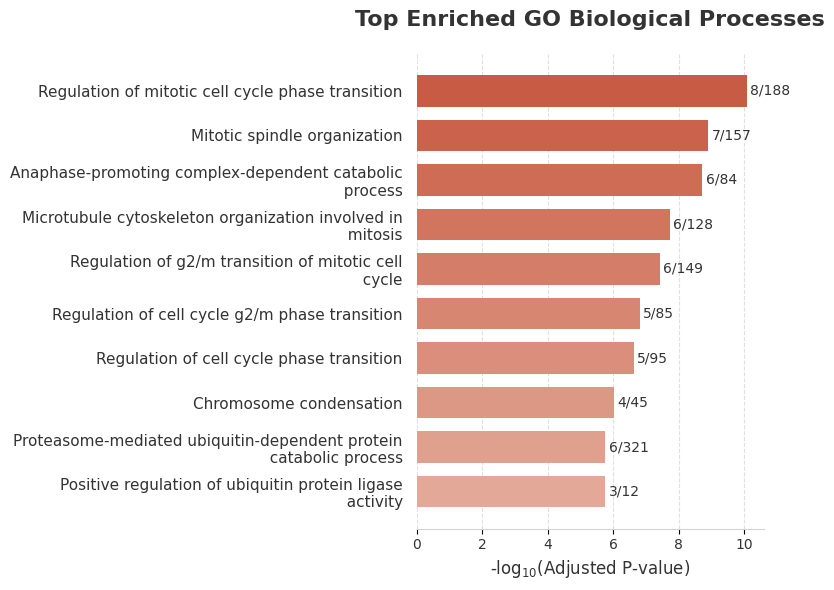

In [8]:
import pandas as pd
import scanpy as sc

file_path = "./Experiment/Temp_Result/hU2OS_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/hU2OS_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df.head(n_genes).index.tolist()
print("Number of selected features:", len(selected_features))
genes_upper = selected_features


# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=list(genes_upper), organism='Human')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/hU2OS_HarmoCycle_GO_BP_Enrichment.png')

# mESCQ-HarmoCycle

      features  highly_variable     means  dispersions  dispersions_norm  \
0  MMU-MIR-703             True  2.960110     2.915235          3.713043   
1       TUBB2C             True  2.084217     1.061022          2.286165   
2        UBE2C             True  0.936423     0.837889          2.614537   
3      GM10259             True  0.868634     0.514419          2.180937   
4      GM10184             True  0.868606     0.514561          2.181127   

   dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
0                       1            1.011625           -1.105859   
1                       1            0.663818           -2.256507   
2                       1            0.609938           -2.402743   
3                       1            0.503232           -2.194234   
4                       1            0.503208           -2.194209   

   dominant_phase_deg  dominant_phase_norm  
0           296.63898             0.323997  
1           230.71169             0.14

/root/Cycle/Github/./HarmoCycle/Utils.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].str.replace(r'\s\(GO:\d+\)$', '', regex=True)
/root/Cycle/Github/./HarmoCycle/Utils.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['Term'] = plot_data['Term'].apply(


Plot saved to: ./FigurePlot/Cycling_GO/mESCQ_HarmoCycle_GO_BP_Enrichment.png
Tip: For Adobe Illustrator editing, save as .pdf or .svg format.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Top Enriched GO Biological Processes'}, xlabel='-log$_{10}$(Adjusted P-value)'>)

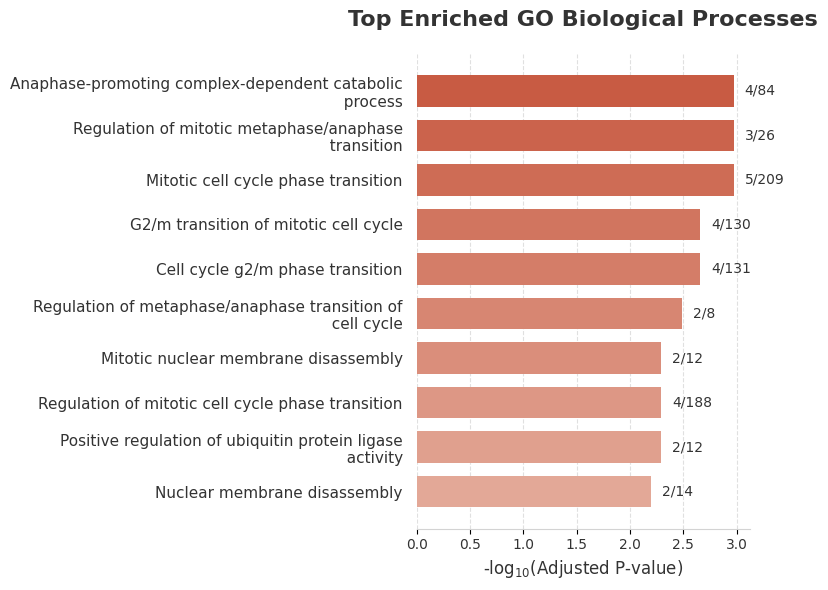

In [9]:
import pandas as pd
import scanpy as sc

file_path = "./Experiment/Temp_Result/mESCQ_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/mESCQ_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df['features'].head(n_genes).values
print("Number of selected features:", len(selected_features))
genes_upper = selected_features

# 2. Load the single-cell dataset (h5ad format) and the corresponding mouse gene list
adata = sc.read_h5ad('./Dataset/mESCQ.h5ad')
gene_df = pd.read_table('/root/Cycle/Github/Dataset/mESCQ_genes_mouse.txt', header=None)

# Add the mouse gene names to adata.var as a new column
adata.var['mouse_gene'] = gene_df[0].values

# 3. Build a mapping dictionary:
#    - Keys: adata.var_names converted to uppercase (to match genes_upper)
#    - Values: corresponding mouse gene names from adata.var['mouse_gene']
mapping = dict(zip(adata.var_names.str.upper(), adata.var['mouse_gene']))

# 4. Retrieve the corresponding mouse gene set by ignoring case differences
#    - For each gene in genes_upper, convert to uppercase
#    - If it exists in the mapping, collect the mapped mouse gene
mouse_genes = [mapping[g.upper()] for g in genes_upper if g.upper() in mapping]

# 5. Run comprehensive enrichment analysis using the mapped mouse gene set
enrichment_result = run_comprehensive_enrichment(gene_list=mouse_genes, organism='Mouse')

# Display the top 10 enrichment results
display_enrichment_results(enrichment_result, top_n=10)
plot_go_bp_enrichment(enrichment_result, top_n=10, save_path='./FigurePlot/Cycling_GO/mESCQ_HarmoCycle_GO_BP_Enrichment.png')